In [1]:
I = [f"{i}" for i in range(1, 16)]
E = [
    ("1", "9"),
    ("1", "11"),
    ("2", "3"),
    ("2", "6"),
    ("2", "7"),
    ("2", "10"),
    ("6", "12"),
    ("3", "15"),
    ("4", "8"),
    ("5", "14"),
    ("8", "15"),
    ("11", "13"),
    ("11", "14"),
    ("13", "15"),
]

NODE_POS = {
    "1": [-3.0, 1.5],
    "2": [2.0, 1.0],
    "3": [1.0, 0.5],
    "4": [2.0, -1.0],
    "5": [-4.0, 0.0],
    "6": [1.0, 1.5],
    "7": [3.0, 0.5],
    "8": [1.0, -0.5],
    "9": [-4.0, 2.0],
    "10": [3.0, 1.5],
    "11": [-2.0, 1.0],
    "12": [0.0, 2.0],
    "13": [-1.0, 0.5],
    "14": [-3.0, 0.5],
    "15": [0.0, 0.0],
}

In [2]:
def server(node_names: list[str], edge_pairs: list[tuple[str, str]]) -> None:
    from logging import basicConfig, INFO

    basicConfig(level=INFO)

    from topolink import Graph

    graph = Graph(node_names, edge_pairs)
    graph.deploy()


server(I, E)

INFO:topolink.Graph:Registry running on 172.26.120.171:33827


KeyboardInterrupt: 

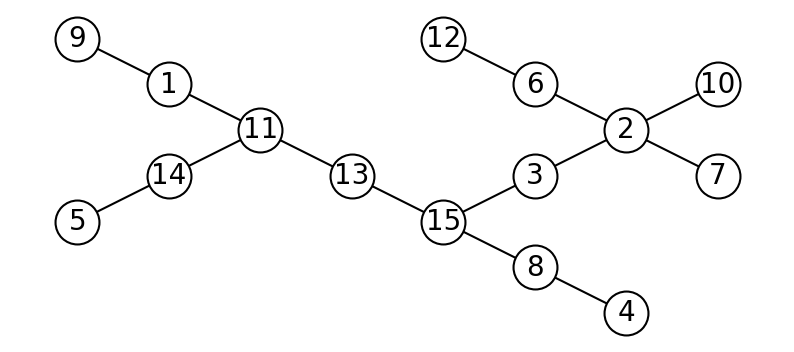

In [3]:
def draw_graph(
    node_names: list[str],
    edge_pairs: list[tuple[str, str]],
    node_pos: dict[str, list[float]],
) -> None:
    import matplotlib.pyplot as plt
    from topolink import Graph

    graph = Graph(node_names, edge_pairs, address="localhost:5555")

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.set_aspect(1)

    nx_options = {
        "with_labels": True,
        "font_size": 20,
        "node_color": "white",
        "node_size": 1000,
        "edgecolors": "black",
        "linewidths": 1.5,
        "width": 1.5,
        "pos": node_pos,
    }

    graph.draw(ax, **nx_options)

    plt.show()

    import os

    fig_dir = os.path.join(os.getcwd(), "figures")
    os.makedirs(fig_dir, exist_ok=True)

    fig_path = os.path.join(fig_dir, "fig_2.pdf")
    fig.savefig(fig_path, format="pdf", bbox_inches="tight")


draw_graph(I, E, NODE_POS)